#### Baseball Case Study - Vinayak Ratan

### Baseball Case Study
##### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

#### Input features:
- R – Runs scored: times reached home plate legally and safely
- AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
- H – Hit: reaching base because of a batted, fair ball without error by the defense
- 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
- 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
- HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
- BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base
- K (or SO) – Strikeout: number of batters who received strike three
- SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
- RA – Run average: number of runs allowed times nine divided by innings pitched
- ER – Earned run: number of runs that did not occur as a result of errors or passed balls
- ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
- SHO – Shutout: number of complete games pitched with no runs allowed
- SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
- CG – Complete game: number of games where player was the only pitcher for their team
- E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

#### Output: Number of predicted wins (W)
- W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# In the dataset column names are abbreviated, hence assigning the respective column names for better understanding of the data
col_names = [ 'Wins','Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks', 'Strikeouts', 
                                   'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Earned Run Average (ERA)', 'Shutouts', 'Saves', 
                                   'Complete Games','Errors']
baseball_df = pd.read_csv(r'G:\AI Professional\Data Trained\Notes\Github docs\Datasets\Data-Science-ML-Capstone-Projects-master/baseball.csv', 
                          names = col_names, header = 0)
baseball_df.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Shutouts,Saves,Complete Games,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


#### Basic information of the baseball dataset

In [3]:
baseball_df.tail()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Shutouts,Saves,Complete Games,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [4]:
baseball_df.sample()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Shutouts,Saves,Complete Games,Errors
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78


In [5]:
baseball_df.shape

(30, 17)

In [6]:
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average (ERA)  30 non-null     float64
 13  Shutouts                  30 non-null     int64  
 14  Saves       

### Exploratory Data Analysis (EDA)

#### Checking for Null values

In [7]:
# There are no null values present in the data
baseball_df.isnull().sum()

Wins                        0
Runs                        0
At Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
Shutouts                    0
Saves                       0
Complete Games              0
Errors                      0
dtype: int64

- There are no null values present in the data

#### Summary Statistics

In [8]:
baseball_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bats,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Homeruns,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Walks,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strikeouts,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Bases,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


<AxesSubplot:>

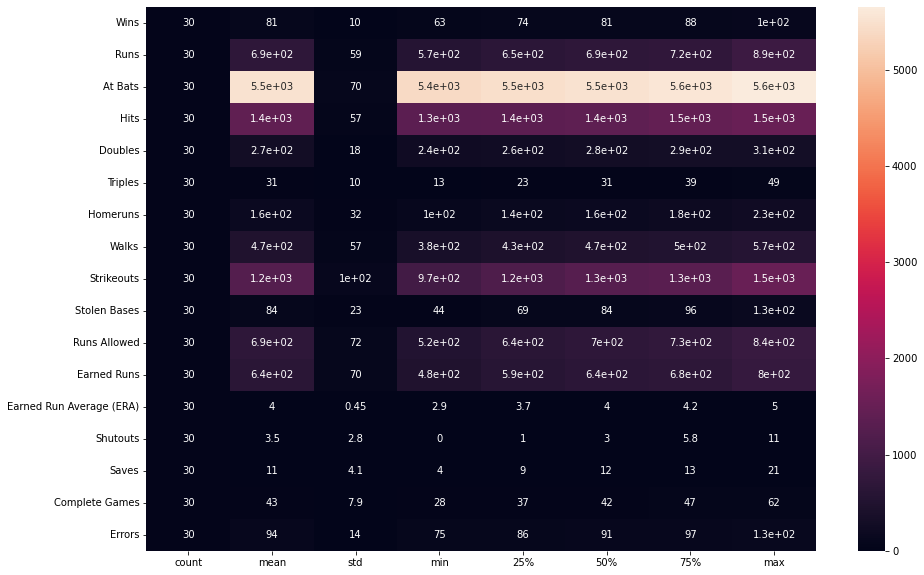

In [9]:
# Plotting the heat map of summary stats
plt.figure(figsize = (15,10))
sns.heatmap(baseball_df.describe().T, annot = True)

#### Correlation

In [10]:
baseball_df.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Shutouts,Saves,Complete Games,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

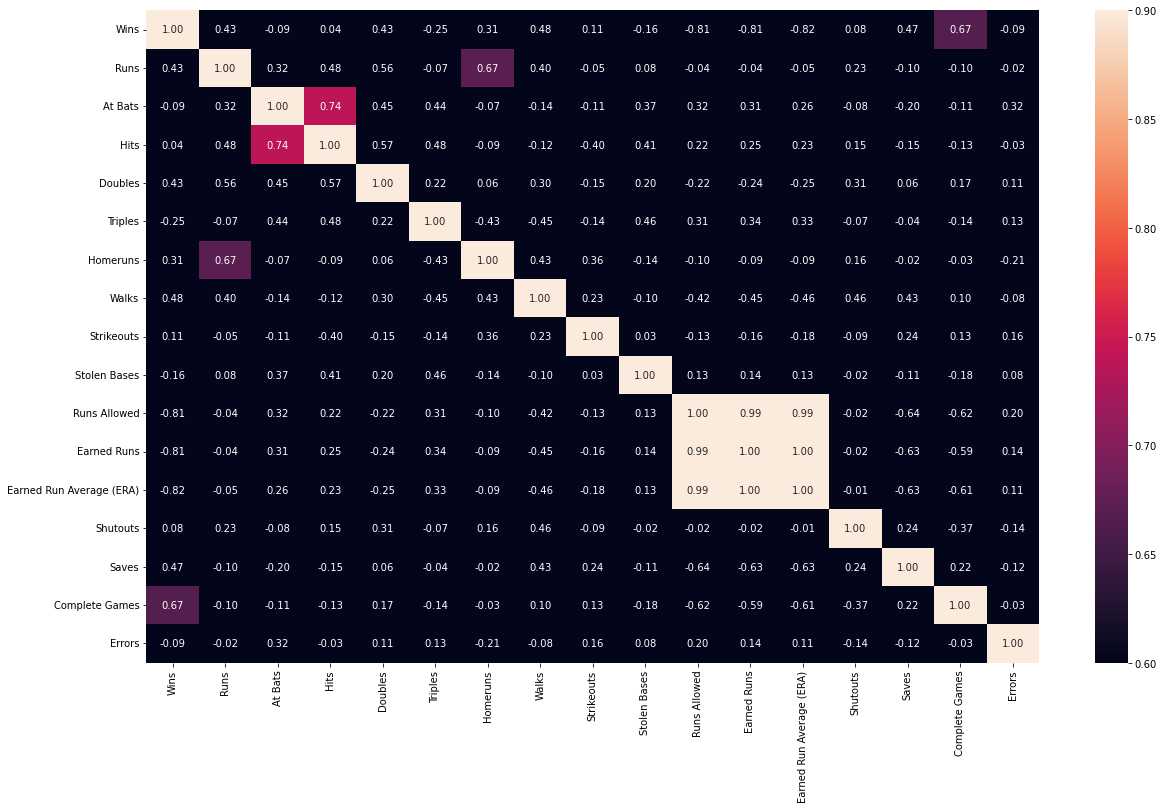

In [11]:
plt.figure(figsize = (20,12))
sns.heatmap(baseball_df.corr(), annot = True, fmt= '0.2f', vmin = 0.6, vmax = 0.9)
# Checking Multicollinearity for positive correlation 

<AxesSubplot:>

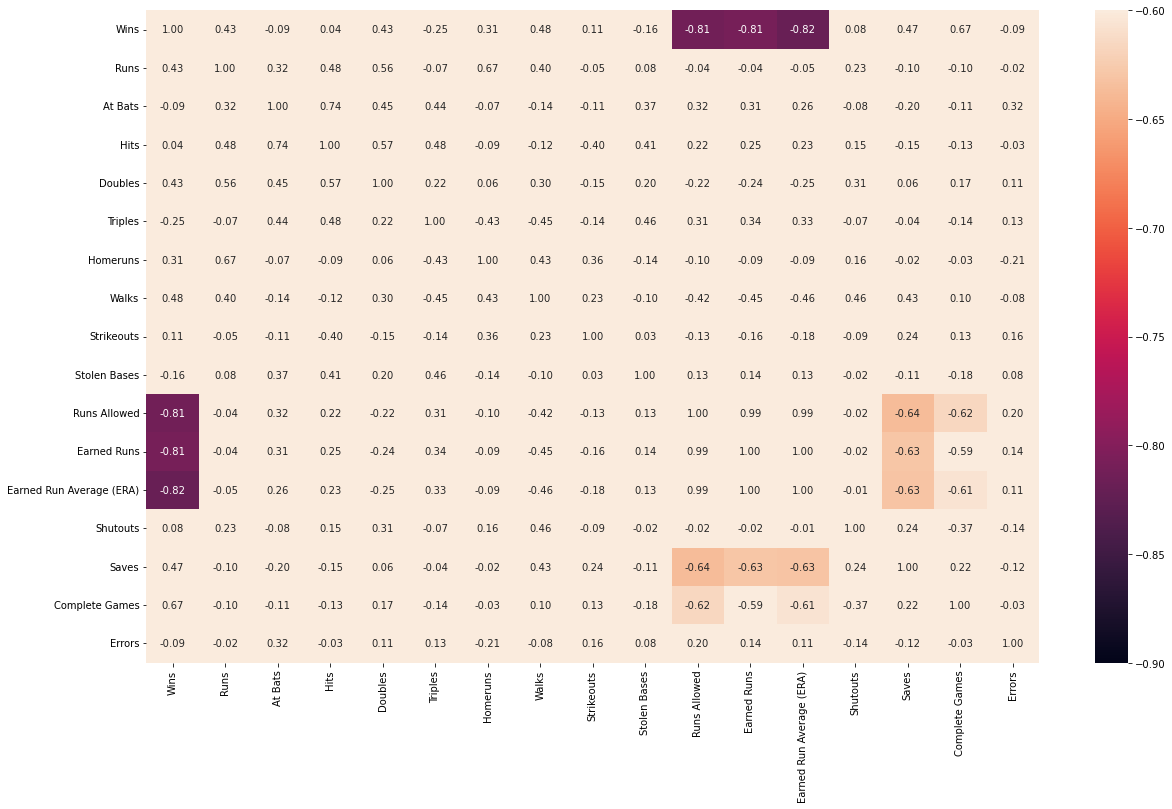

In [12]:
plt.figure(figsize = (20,12))
sns.heatmap(baseball_df.corr(), annot = True, fmt= '0.2f', vmin = -0.9, vmax = -0.6)
# Checking Multicollinearity for positive correlation

- Looking at correlation matrix we can see that most of the data are highly correlated with each other showing multicollinearity present.
- In this very high correlated is Earned Runs and ERA, and also when we see the feature details the ERA is calculated using ER.
- Hence we can drop ER column before checking for VIF

In [13]:
baseball_df.drop(['Earned Runs'], axis = 1, inplace = True)
baseball_df.sample()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Run Average (ERA),Shutouts,Saves,Complete Games,Errors
8,80,644,5485,1383,278,32,167,436,1310,87,642,3.74,1,12,60,95


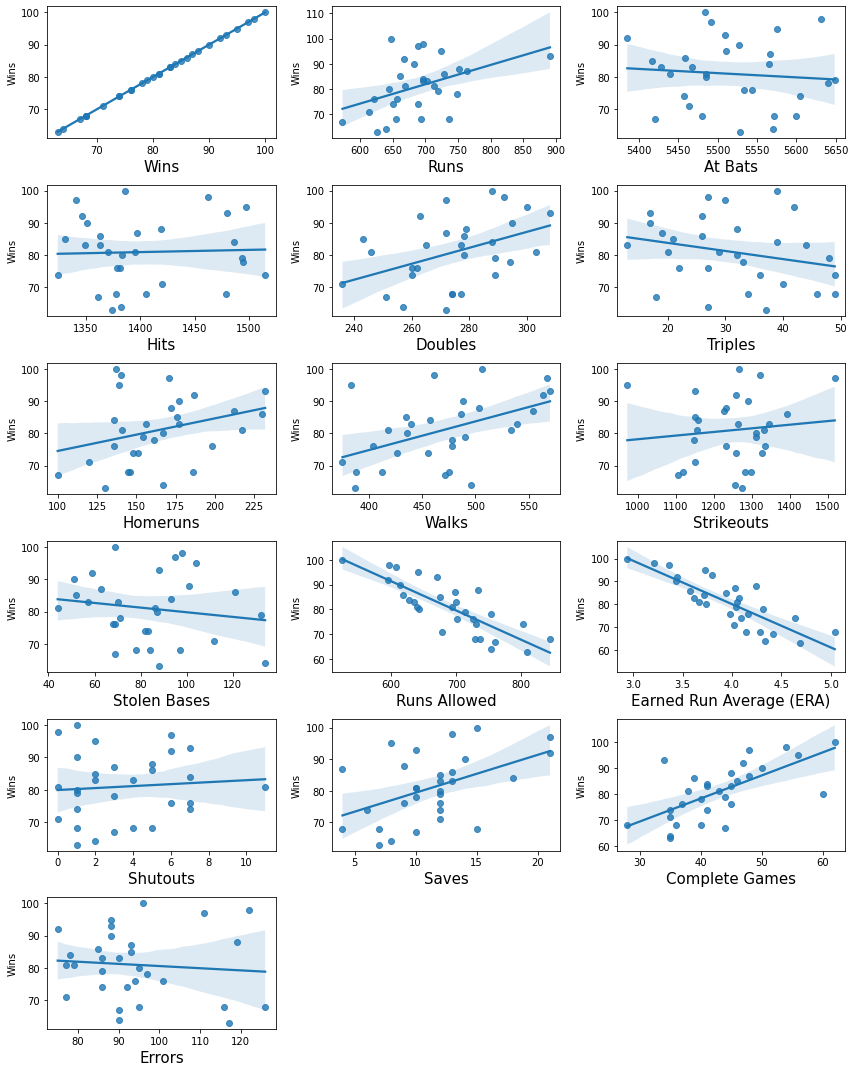

In [14]:
plt.figure(figsize=(12,15))

p_no = 1
for i in baseball_df.columns:
    if p_no <= 17:
        ax = plt.subplot(6,3,p_no)
        sns.regplot(x = i, y = 'Wins', data = baseball_df)
        plt.xlabel(i, fontsize = 15)
    p_no += 1

plt.tight_layout()

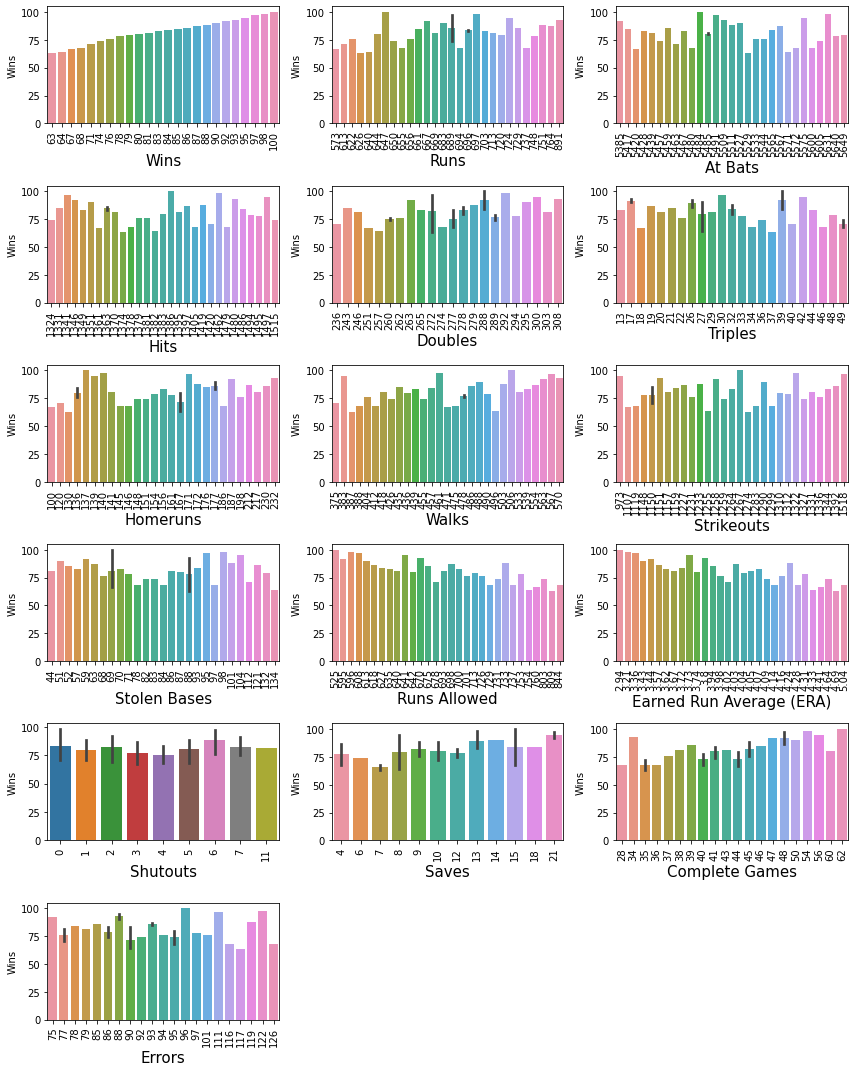

In [15]:
plt.figure(figsize=(12,15))

p_no = 1
for i in baseball_df.columns:
    if p_no <= 17:
        ax = plt.subplot(6,3,p_no)
        sns.barplot(x = i, y = 'Wins', data = baseball_df)
        plt.xlabel(i, fontsize = 15)
        plt.xticks(rotation = 'vertical')
    p_no += 1

plt.tight_layout()

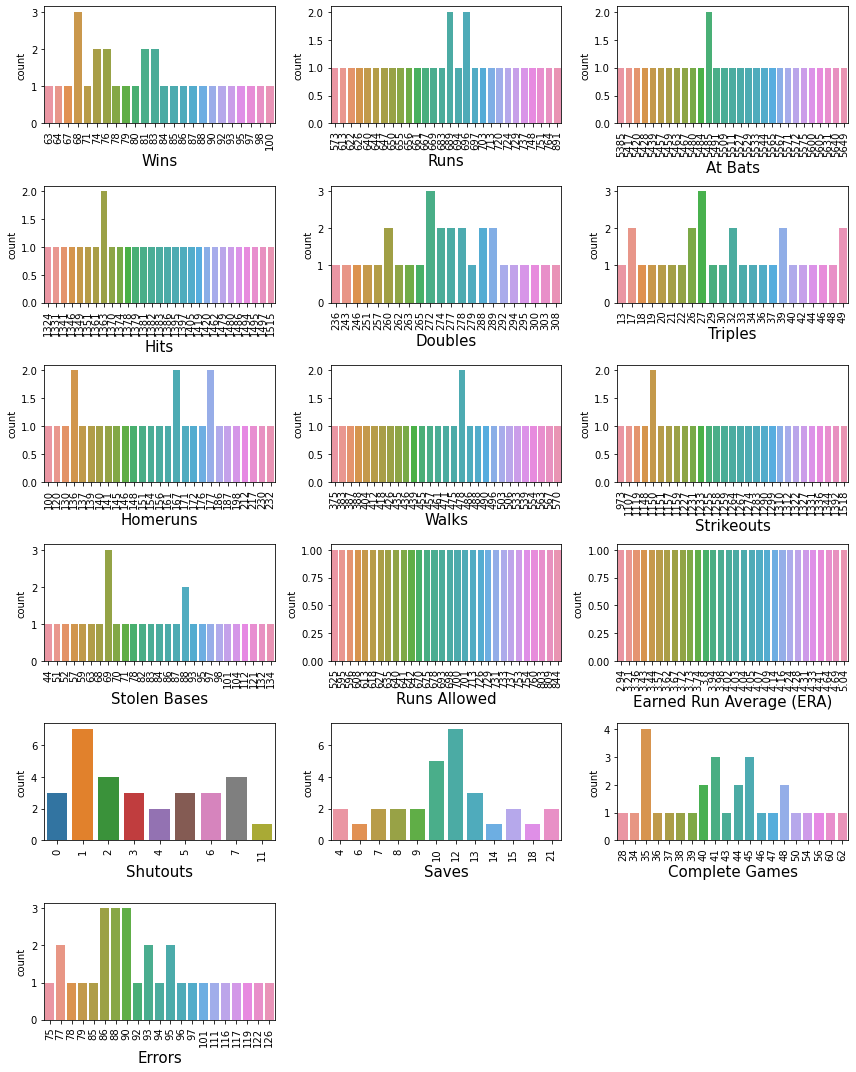

In [16]:
plt.figure(figsize=(12,15))

p_no = 1
for i in baseball_df.columns:
    if p_no <= 17:
        ax = plt.subplot(6,3,p_no)
        sns.countplot(x= i,data=baseball_df)
        plt.xlabel(i, fontsize = 15)
        plt.xticks(rotation = 'vertical')
    p_no += 1

plt.tight_layout()

<Figure size 720x432 with 0 Axes>

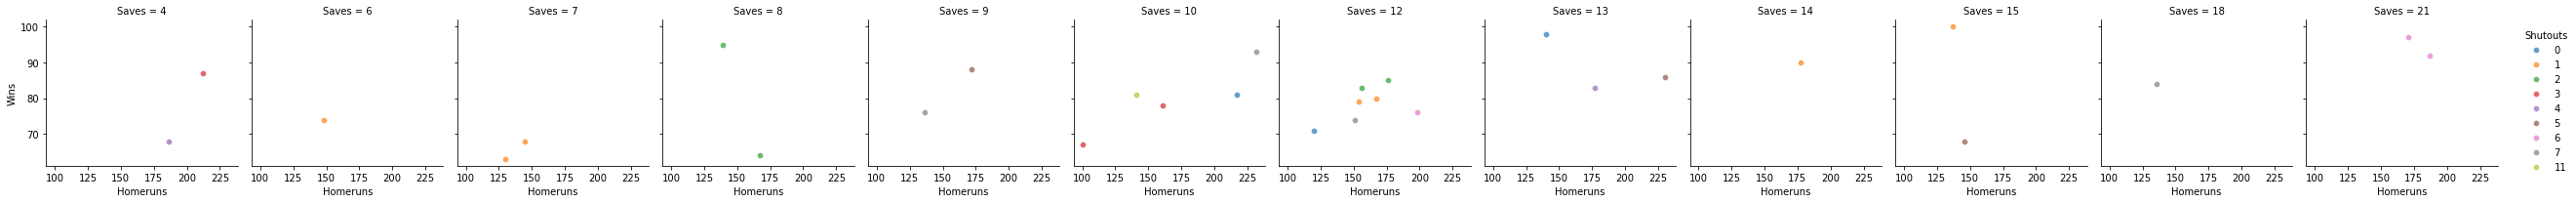

In [17]:
plt.figure(figsize = (10,6))
g = sns.FacetGrid(baseball_df, col="Saves", hue="Shutouts")
g.map(sns.scatterplot, "Homeruns", "Wins", alpha=.7)
g.add_legend()

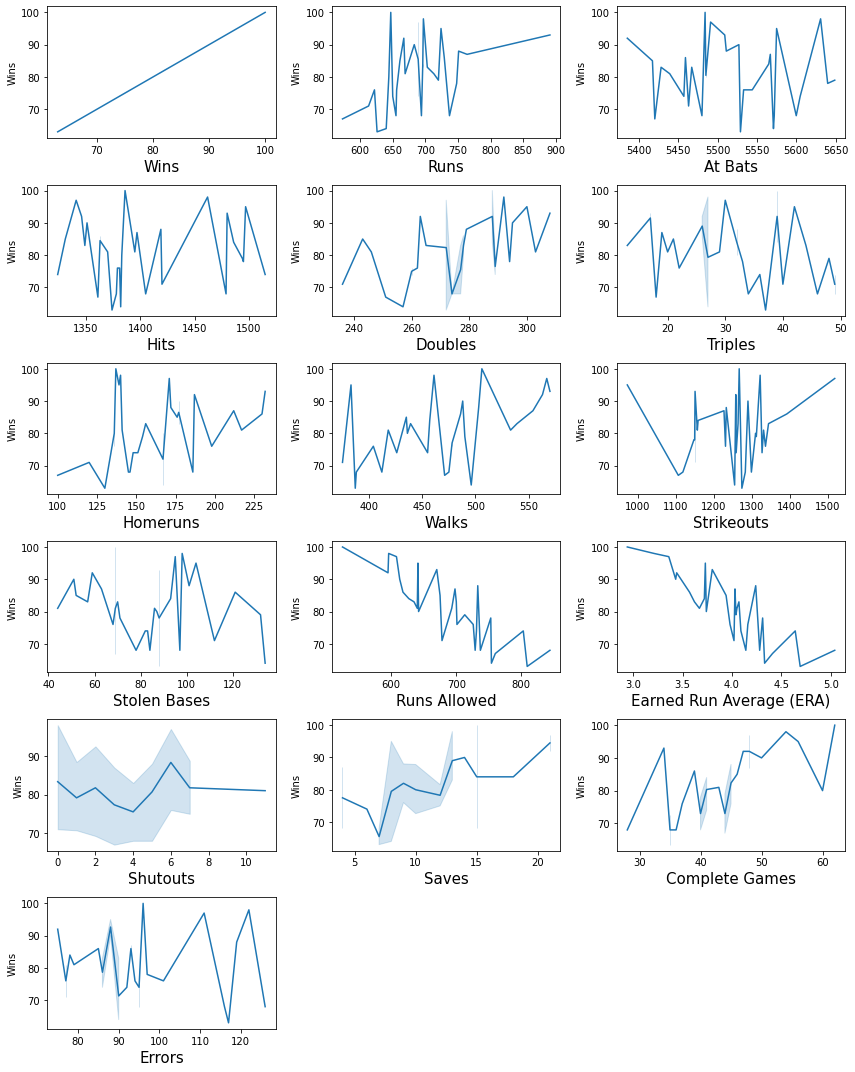

In [18]:
plt.figure(figsize=(12,15))

p_no = 1
for i in baseball_df.columns:
    if p_no <= 17:
        ax = plt.subplot(6,3,p_no)
        sns.lineplot(x = i, y = 'Wins', data = baseball_df)
        plt.xlabel(i, fontsize = 15)
    p_no += 1

plt.tight_layout()

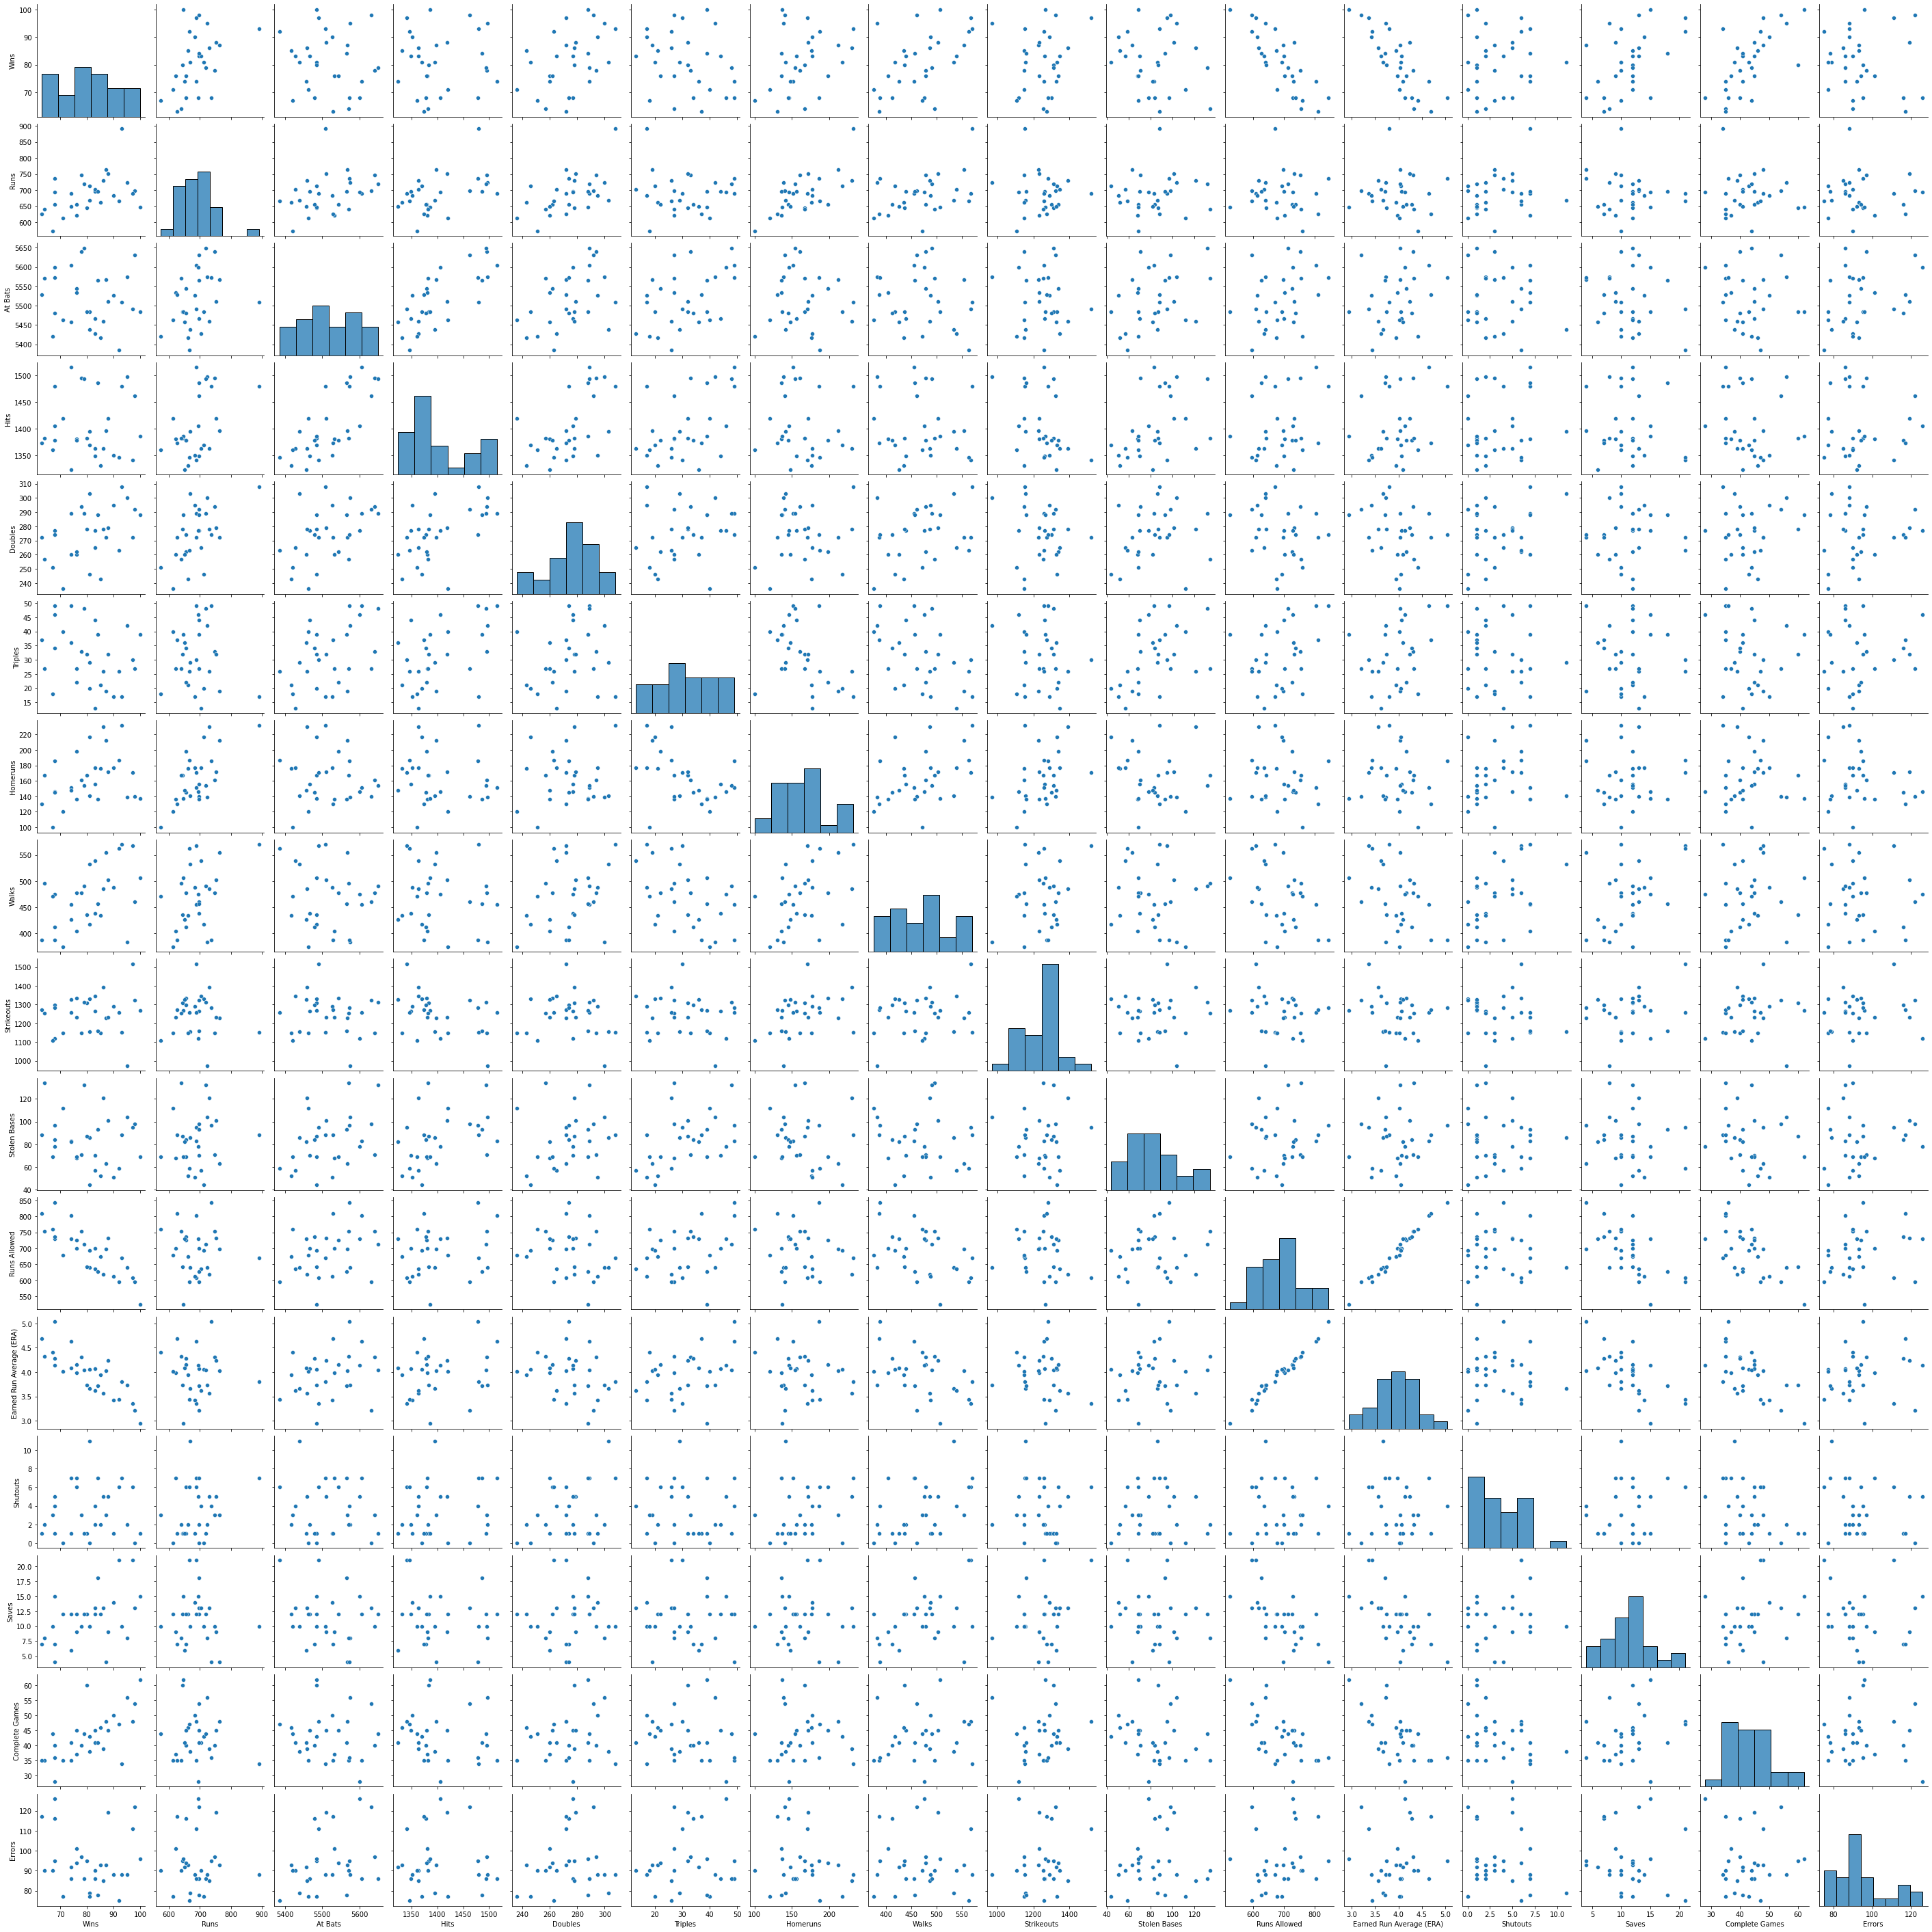

In [19]:
sns.pairplot(baseball_df)

#### Checking for skewness

In [20]:
baseball_df.skew()

Wins                        0.047089
Runs                        1.200786
At Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Stolen Bases                0.479893
Runs Allowed                0.045734
Earned Run Average (ERA)    0.053331
Shutouts                    0.736845
Saves                       0.565790
Complete Games              0.657524
Errors                      0.890132
dtype: float64

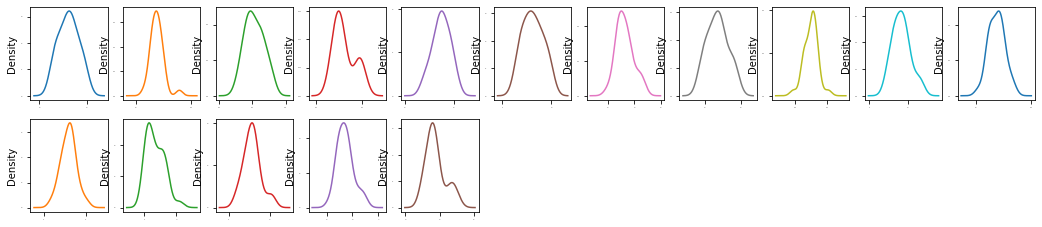

In [21]:
# Lets plot distribution plot
baseball_df.plot(kind='density', subplots = True, layout = (6,11), sharex = False, legend= False, fontsize =1, figsize = (18,12))
plt.show()

In [22]:
# Lets split the target variable and feature variable before removing the skewness
X = baseball_df.drop(columns=["Wins"])
y = baseball_df[["Wins"]]

In [23]:
# Lets keep the threshold as 0.5 and remove the skewness using transformation
for index in X.skew().index:
    if X.skew().loc[index]>0.5:
        X[index]=np.log1p(X[index])
    if X.skew().loc[index]<-0.5:
        X[index]=np.square(X[index])

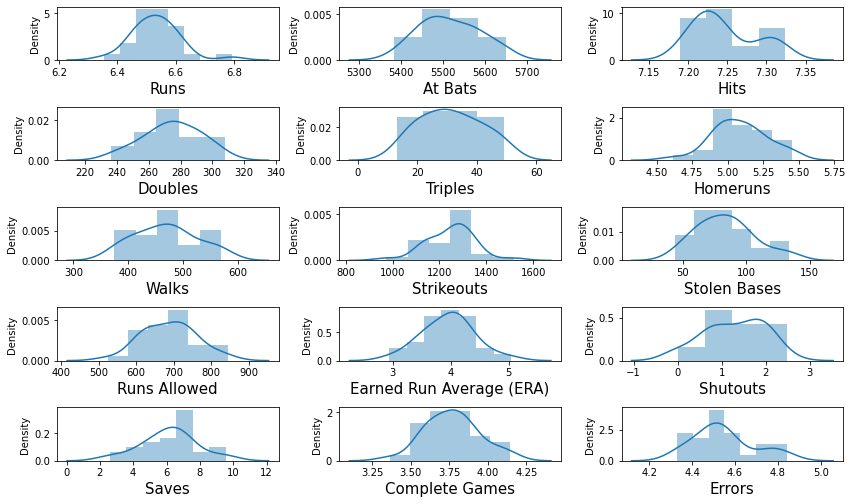

In [24]:
plt.figure(figsize=(12,8))

p_no = 1
for i in X.columns:
    if p_no <= 17:
        ax = plt.subplot(6,3,p_no)
        sns.distplot(X[i])
        plt.xlabel(i, fontsize = 15)
    p_no += 1

plt.tight_layout()
        

In [25]:
X.skew()

Runs                        0.744813
At Bats                     0.183437
Hits                        0.628584
Doubles                    -0.230650
Triples                     0.129502
Homeruns                   -0.009528
Walks                       0.158498
Strikeouts                 -0.156065
Stolen Bases                0.479893
Runs Allowed                0.045734
Earned Run Average (ERA)    0.053331
Shutouts                   -0.325962
Saves                      -0.093545
Complete Games              0.163057
Errors                      0.632916
dtype: float64

#### Checking for Outliers

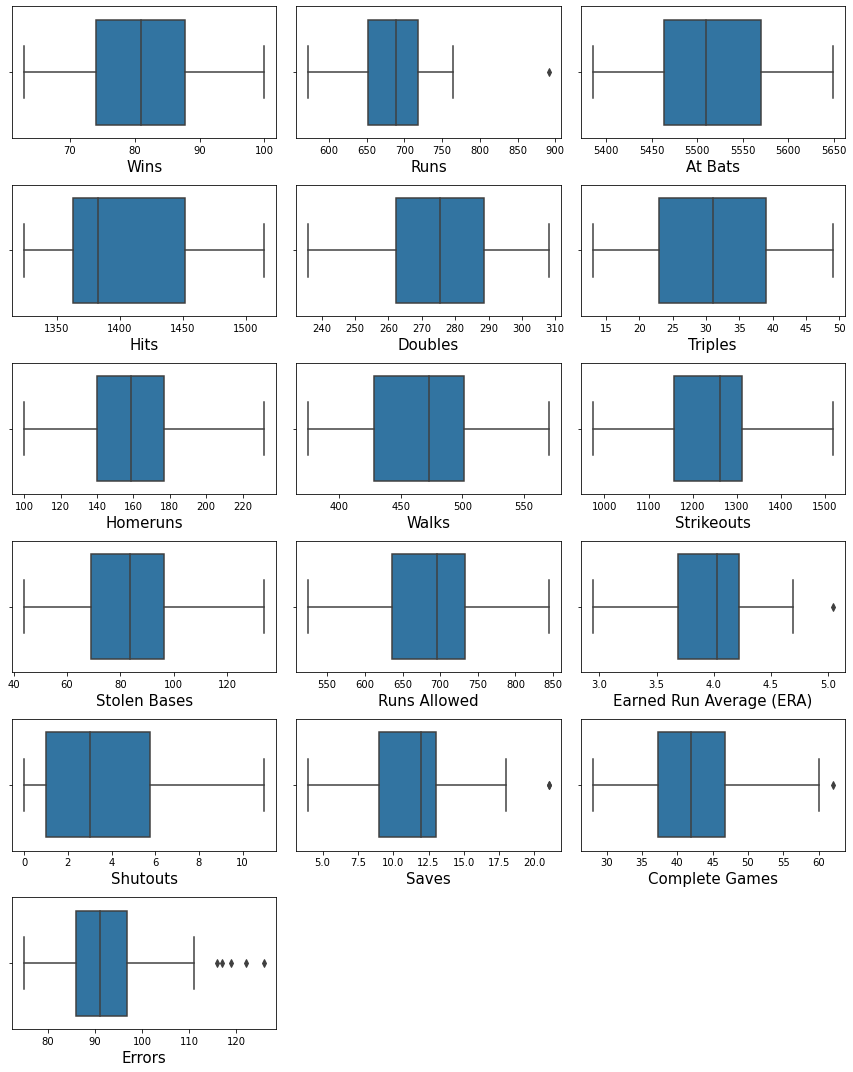

In [26]:
plt.figure(figsize=(12,15))

p_no = 1
for i in baseball_df.columns:
    if p_no <= 17:
        ax = plt.subplot(6,3,p_no)
        sns.boxplot(x = i, data = baseball_df)
        plt.xlabel(i, fontsize = 15)
    p_no += 1

plt.tight_layout()

In [27]:
from scipy.stats import zscore
z = np.abs(zscore(baseball_df))
z

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Run Average (ERA),Shutouts,Saves,Complete Games,Errors
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.792164,0.171757,0.320914,0.396360,0.194303


In [28]:
# List of array containing z-score greater than 3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [29]:
baseball_df_new = baseball_df[(z<3).all(axis=1)]
baseball_df_new

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Run Average (ERA),Shutouts,Saves,Complete Games,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,4.24,5,9,45,119


#### Checking variance inflation factor 

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif_bb=pd.DataFrame()
    vif_bb['VIF_Factor']= [variance_inflation_factor(baseball_df_new.values, i) for i in range(baseball_df_new.shape[1])]
    vif_bb['features names']=baseball_df_new.columns
    print(vif_bb)

In [31]:
vif_calc()

     VIF_Factor            features names
0   1095.685417                      Wins
1   3351.072335                      Runs
2   4854.906650                   At Bats
3   4063.923075                      Hits
4   1089.998631                   Doubles
5     34.893060                   Triples
6    229.208112                  Homeruns
7    290.367766                     Walks
8    359.894365                Strikeouts
9     27.292456              Stolen Bases
10  8650.877529              Runs Allowed
11  7567.641861  Earned Run Average (ERA)
12     9.454880                  Shutouts
13    32.917867                     Saves
14   281.556610            Complete Games
15    95.313497                    Errors


<AxesSubplot:>

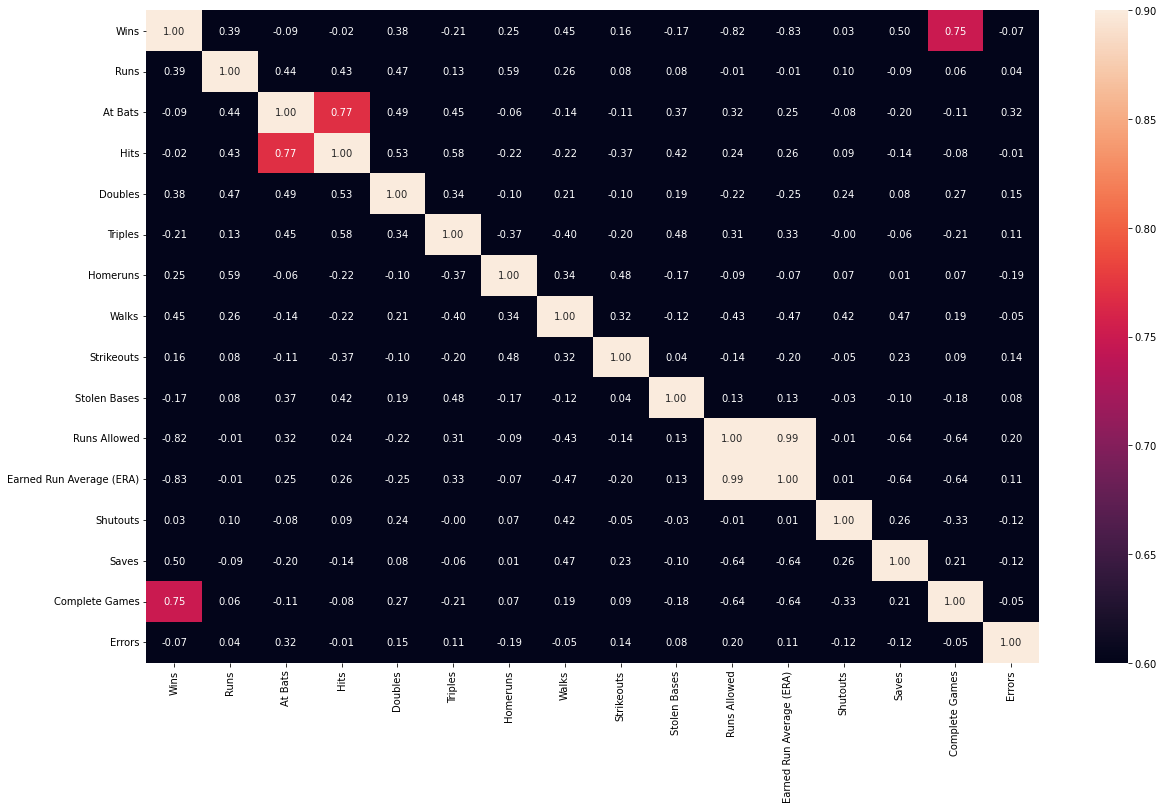

In [32]:
plt.figure(figsize = (20,12))
sns.heatmap(baseball_df_new.corr(), annot = True, fmt= '0.2f', vmin = 0.6, vmax = 0.9)

- Both runs allowed and ERA are highly negatively correlated with target variable, but runs allowed is little less, hence we will drop Runs Allowed column

In [33]:
baseball_df_new.drop(['Runs Allowed'], axis = 1, inplace = True)
baseball_df_new.sample()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Earned Run Average (ERA),Shutouts,Saves,Complete Games,Errors
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88


In [34]:
vif_calc()

     VIF_Factor            features names
0   1059.981837                      Wins
1   3178.606683                      Runs
2   4842.528826                   At Bats
3   4023.303068                      Hits
4   1028.144913                   Doubles
5     34.874081                   Triples
6    228.841371                  Homeruns
7    248.026083                     Walks
8    325.375817                Strikeouts
9     26.516987              Stolen Bases
10   683.334898  Earned Run Average (ERA)
11     8.595672                  Shutouts
12    28.726075                     Saves
13   242.942107            Complete Games
14    76.296055                    Errors


- We will drop hits column too

In [35]:
baseball_df_new.drop(['Hits'], axis = 1, inplace = True)
baseball_df_new.sample()

,Wins,Runs,At Bats,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Earned Run Average (ERA),Shutouts,Saves,Complete Games,Errors
11,86,729,5459,278,26,230,486,1392,121,3.57,5,13,39,85


In [36]:
vif_calc()

     VIF_Factor            features names
0   1007.437527                      Wins
1   2264.459498                      Runs
2   2356.046480                   At Bats
3   1028.137714                   Doubles
4     34.704391                   Triples
5    177.061570                  Homeruns
6    209.586036                     Walks
7    318.848227                Strikeouts
8     22.790342              Stolen Bases
9    681.347745  Earned Run Average (ERA)
10     7.788827                  Shutouts
11    26.226013                     Saves
12   218.766738            Complete Games
13    62.677680                    Errors


In [37]:
# Lets split the target variable and feature variable
X = baseball_df_new.drop(columns=["Wins"])
y = baseball_df_new[["Wins"]]

#### Scaling the data using MinMaxScaler

In [38]:
from sklearn.preprocessing import MinMaxScaler
mms_bb = MinMaxScaler()
X = mms_bb.fit_transform(X)
X

array([[0.79057592, 0.71969697, 0.95522388, 0.80555556, 0.3       ,
        0.04166667, 0.        , 0.66666667, 0.37619048, 0.18181818,
        0.23529412, 0.82352941, 0.25490196],
       [0.64397906, 0.31060606, 0.6119403 , 0.86111111, 0.43076923,
        0.33333333, 0.53394495, 0.28888889, 0.53809524, 0.18181818,
        0.47058824, 0.5       , 0.21568627],
       [0.5026178 , 0.20454545, 1.        , 0.44444444, 0.31538462,
        0.82291667, 0.33761468, 0.46666667, 0.34761905, 1.        ,
        0.35294118, 0.29411765, 0.07843137],
       [0.2565445 , 0.56060606, 0.35820896, 0.38888889, 0.27692308,
        0.15104167, 0.4733945 , 0.26666667, 0.4952381 , 0.63636364,
        0.29411765, 0.26470588, 0.50980392],
       [0.60732984, 0.83333333, 0.79104478, 1.        , 0.39230769,
        0.41666667, 0.52477064, 0.43333333, 0.80952381, 0.63636364,
        0.47058824, 0.20588235, 0.21568627],
       [1.        , 0.68939394, 0.53731343, 0.16666667, 0.86153846,
        0.93229167, 0.46605

### Model Building

In [39]:
# Importing the libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [40]:
# Instantiating each algorithm
lr = LinearRegression()
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
svr = SVR()
rfr = RandomForestRegressor()

# List of instantiated algorithms
model = [lr, dtr, knr, svr, rfr]

In [41]:
# Maximum accuracy
maxAccu_bb = 0 

# Best random state value for which accuracy is achieved 
maxRS_bb = 0

for m in model:
    for i in range(0,500):
        x_train, x_test,y_train, y_test = train_test_split(X,y, random_state=i, test_size=0.20)
        m.fit(x_train, y_train)
        pred_train_bb= m.predict(x_train)
        pred_test_bb = m.predict(x_test)
        score_train_bb = m.score(x_train, y_train)
        score_test_bb = m.score(x_test, y_test)
        r2_bb = r2_score(y_test, pred_test_bb)
        print(f'----------------At random State {i} ------------------')
        print(f"Training score is {score_train_bb}")
        print(f"Testing score is {score_test_bb}")
        print(f'r2 score of {m} is {r2_bb}')
    
        if r2_bb > maxAccu_bb:
            maxAccu_bb = r2_bb
            maxRS_bb = i
            print(f"Maximum score of {m} is {maxAccu_bb} at Random state {i}")
            print('\n')
    print('*'*120)

----------------At random State 0 ------------------
Training score is 0.9783423534438642
Testing score is 0.31196945874058557
r2 score of LinearRegression() is 0.31196945874058557
Maximum score of LinearRegression() is 0.31196945874058557 at Random state 0


----------------At random State 1 ------------------
Training score is 0.9557431714719214
Testing score is 0.7764925942445527
r2 score of LinearRegression() is 0.7764925942445527
Maximum score of LinearRegression() is 0.7764925942445527 at Random state 1


----------------At random State 2 ------------------
Training score is 0.9517980709544983
Testing score is -0.10145455538103598
r2 score of LinearRegression() is -0.10145455538103598
----------------At random State 3 ------------------
Training score is 0.9304473888857443
Testing score is 0.8938470116147662
r2 score of LinearRegression() is 0.8938470116147662
Maximum score of LinearRegression() is 0.8938470116147662 at Random state 3


----------------At random State 4 ---------

##### Observations
- Maximum score of LinearRegression() is 0.9730190457300131 at Random state 218
- Linear Regression is Best results compared to all other algorithms

#### Cross validation of all the Algorithms

In [42]:
# Before proceeding with the hpyer parameter tunning we will check for cross validation
from sklearn.model_selection import cross_val_score
max_cvscore_bb = 0 
max_cv_bb = 0
for m in model:
    print(f'---------------------- Cross Validation of {m} --------------------------')
    for j in range(2,15):
        cv_score_bb = cross_val_score(m, X,y,cv=j)
        cv_mean_bb = cv_score_bb.mean()
        print(f"At cross fold {j} the cv score is {cv_mean_bb}")
        print('\n') 
    
        if cv_mean_bb > max_cvscore_bb:
            max_cvscore_bb=cv_mean_bb
            max_cv_bb = j
            print(f"At cross fold {j} the Maximum CV score is {max_cvscore_bb}")
            print('\n') 
    print('*'*120)
    print('\n')

---------------------- Cross Validation of LinearRegression() --------------------------
At cross fold 2 the cv score is -1.2375458261182455


At cross fold 3 the cv score is 0.28881173741746974


At cross fold 3 the Maximum CV score is 0.28881173741746974


At cross fold 4 the cv score is 0.3383430972290158


At cross fold 4 the Maximum CV score is 0.3383430972290158


At cross fold 5 the cv score is 0.3406160370500354


At cross fold 5 the Maximum CV score is 0.3406160370500354


At cross fold 6 the cv score is 0.3142083440809314


At cross fold 7 the cv score is 0.1600434570366891


At cross fold 8 the cv score is 0.3983170967744504


At cross fold 8 the Maximum CV score is 0.3983170967744504


At cross fold 9 the cv score is -4.366402489134324


At cross fold 10 the cv score is -3.8198073894545304


At cross fold 11 the cv score is -3.7020281524149685


At cross fold 12 the cv score is -20.728332178358077


At cross fold 13 the cv score is -19.053443565526706


At cross fold 14 the

##### Observations
- Linear regression: At cross fold 8 the Maximum CV score is 0.3983170967744504
- KNeighborsRegressor: At cross fold 4 the Maximum CV score is 0.42193395625917135
- RandomForestRegressor: At cross fold 4 the Maximum CV score is 0.483702319747563

- Lets proceed with Linear regression since it is giving very good accuracy

#### Training Linear Regression for Random state 218

In [43]:
x_train, x_test,y_train, y_test = train_test_split(X,y, random_state=218, test_size=0.20)
lr.fit(x_train, y_train)
pred_train_bb= lr.predict(x_train)
pred_test_bb = lr.predict(x_test)
score_train_bb = lr.score(x_train, y_train)
score_test_bb = lr.score(x_test, y_test)
r2_bb = r2_score(y_test, pred_test_bb)
print(f"Training score is {score_train_bb}")
print(f"Testing score is {score_test_bb}")
print(f'r2 score of {lr} is {r2_bb}')

Training score is 0.9267314562087975
Testing score is 0.9730190457300131
r2 score of LinearRegression() is 0.9730190457300131


In [44]:
# Cross Validation again for Linear Regression for CV = 8
cv_score_bb = cross_val_score(lr, X,y,cv=8)
cv_mean_bb = cv_score_bb.mean()
print(f"At cross fold {j} the cv score is {cv_mean_bb}")

At cross fold 14 the cv score is 0.3983170967744504


### Hyper Parameter Tunning

In [45]:
from sklearn.model_selection import GridSearchCV
LinearRegression()

LinearRegression()

##### Tunning for Linear Regression

In [51]:
param = {"fit_intercept": [True, False]}

gcv = GridSearchCV(lr,param,cv=8,scoring= 'accuracy')

# training
gcv.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv.best_params_)

print("Best Estimator:",gcv.best_estimator_)

gcv_lr_pred_bb=gcv.best_estimator_.predict(x_test)

print('Final Accuracy with Linear Regression:', r2_score(y_test,gcv_lr_pred_bb))

Best parameters: {'fit_intercept': True}
Best Estimator: LinearRegression()
Final Accuracy with Linear Regression: 0.9730190457300131


### Pickling

In [52]:
# Pickling of the file or serialization of a file
import joblib
joblib.dump(gcv.best_estimator_,"Baseball.pkl")

['Baseball.pkl']

In [53]:
baseball_model = joblib.load('Baseball.pkl')
baseball_result = baseball_model.score(x_test, y_test)
print(baseball_result*100)

97.30190457300131


##### Thank You